# Table of content

1. Introduction - Loading libraries and dataset
2. Exploratory analysis, engineering and cleaning features - Bi-variate analysis
3. Correlation analysis - Tri-variate analysis
4. Predictive modelling, cross-validation, hyperparameters and ensembling




# Loading libraries and dataset

#### Importing Library

In [112]:
# Load libraries for analysis and visualization
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter

# Machine learning libraries
import xgboost as xgb  # Implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import sklearn         # Collection of machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier)
#from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, precision_recall_curve, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [113]:
 pip install prince --upgrade

Requirement already up-to-date: prince in c:\users\user\anaconda3\lib\site-packages (0.7.1)
Note: you may need to restart the kernel to use updated packages.


In [114]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD
import prince

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LinearRegression
import itertools
from sklearn import linear_model
from sklearn import metrics

#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

# data preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.metrics import classification_report


In [116]:
dataset = pd.read_excel("BD Kc colorectal_stage ESI.xlsx")
df = dataset.copy()
df.shape

(347, 189)

In [117]:
na = ["?","à compléter", 'A compléter', 'pas de n°tel','à compléter']
for col in df.columns:
    for i in range(df.shape[0]):
        if df[col][i] in na:
            df[col][i] = np.nan

In [118]:
L = ['date_chir', 'D dernière onsultation', 'D contact tél', 
       'Decès date', 'statut_prog', 'Date recidive', 'Evolution recid',
       'remarques','Unnamed: 188']
for col in L:
    del df[col]
    

### Suppression des lignes contenant Morbidité NaN.

In [119]:
indexNames = df[df['Morbidité'].isna()].index
df.drop(indexNames , inplace=True)
df['Morbidité'].isnull().sum()

0

In [120]:
df.reset_index(drop = True, inplace = True)

### Suppression des features qui ne sont pas nécessaires ( avec accord)

In [121]:
L = ['signif Incid Perop','signif CP', 'FistJPostOP',  'signif autres.1',
     'PéritoJPostop', 'signif autres Manifcliniq ', 'signif autres','SténoJPostOP',
    'FRVJPostOP','CStomiJPostOP', 'CHémorJPostOP', 'CUrinairJPostOP' ,   'CUrinairTrait',
     'DélaisPostRCCH','DuréeSéjPostOP','DuréeSéjRéa' ,'DécJPostOP','CauseDécès']
for col in L:
    del df[col]

In [122]:
df.shape

(338, 162)

In [123]:
# Remplacer les valeurs manquantes par NaN.

li_8 = ["atcd chir","Localisation","TDMSiège", "CmplcatParié", "Cplct Générl"]
li_6_8 = ["Type histologique"]


for col in li_8:
    df.loc[df[col] == 8, col] = np.nan

df.loc[df["Décès"] == 9, "Décès"] = np.nan
df.loc[df["trouble transi"] == 2, "trouble transi"] = np.nan
df.loc[df["Type histologique"] == 6 , "Type histologique"] = np.nan
df.loc[df["Type histologique"] == 8, "Type histologique"] = np.nan
df.loc[df["ACE"] == 'inf 0,50', "ACE"] = 0.5


### Remplissage des valeurs manquantes ( pour les complications )

In [124]:
L = ['FistEvolution', 'PéritoEvolution', 'SténoEvoluti','FRVEvolution', 'CStomiEvolut', 'CPérinEvolut', 'CUrinairEvolu' ]
for col in L:
    df.loc[df[col].isna() == False, col] = 1  # évolution
    df[col] = df[col].fillna(0)  # Pas d'évolution

In [125]:
for col in df.columns[df.columns.get_loc("CmplcatPerOP"):df.columns.get_loc("Cplct Générl")+1]:
    df[col] = df[col].fillna(0)

#### Remplissage des NaN pour les features ( avant Morbidité)

### Fillna with mean

In [126]:
numeric_features = ["Age","Hémoglobine","Globule blanc", "Plaquette","CRP" , "Urée" , "Créat" , "Glycémie" , "Albumine" ,
"Préalbumine" , "Protidemie" , "ACE" , "CA19-9"  , 'Histo Nbgg', 'Histo ggPosit']

for col in numeric_features:
    df[col] = df[col].fillna(df[col].mean())
    
    print(df[col].isnull().mean(), end='|')

0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|0.0|

###  Vérifier ( DécèsPostOP, Décès ).

In [127]:
df.loc[df['DécèsPostOP'] == 1, 'Décès'] = 1

### Remplacer par les valeurs dominantes ( TNM, Stade - Localisation - Anastomose )

In [128]:
df['Anastomose'] = df['Anastomose'].fillna(2) 
df['Localisation'] = df['Localisation'].fillna(7) 
df['Stade'] = df['Stade'].fillna(2) 
df['TNM'] = df['TNM'].fillna('pT3N0') 

In [129]:
for col in df.columns[df.columns.get_loc('BH'):df.columns.get_loc("TraitAdjAutre")+1]:
    df[col] = df[col].fillna(0)

In [130]:
df.loc[df['HistoLRL'] == 0.9, 'HistoLRL'] = 1

In [131]:
for col in df.columns[df.columns.get_loc('HTA'):df.columns.get_loc("TV result")+1]:
    df[col] = df[col].fillna(0)

In [132]:
df.isnull().mean().sort_values(ascending = False)

Décès           0.565089
DécèsPostOP     0.002959
ACE             0.000000
CA19-9          0.000000
Polype          0.000000
                  ...   
TraitemAdj      0.000000
Stade           0.000000
TNM             0.000000
HistoPerfT/R    0.000000
N               0.000000
Length: 162, dtype: float64

In [133]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
missing_values_count = df.isnull().sum()
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.35064650449265833


In [134]:
df.shape

(338, 162)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Columns: 162 entries, N to Décès
dtypes: datetime64[ns](1), float64(119), int64(12), object(30)
memory usage: 427.9+ KB


In [136]:
#Feature selection
data=df.copy()
for col in numeric_features:
    del data[col]
del data['Date chirurg']

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Columns: 146 entries, N to Décès
dtypes: float64(104), int64(12), object(30)
memory usage: 385.7+ KB


In [138]:
data.columns.tolist()

['N',
 'Sexe',
 'HTA',
 'diabète',
 'cardiopathie',
 'obésité',
 'atcd med autre',
 'signif atcd autr',
 'atcd chir',
 'signif atcdchir',
 'ANTCDTs Toxique',
 'ATCDTs Familiaux',
 'signif atcdfamil',
 'Rectorragie',
 'syndro rectal',
 'trouble transi',
 'occlusion',
 'dleur abdo',
 'peritonite',
 'sign clin autre',
 'TR',
 'TRProcessus',
 'TRSténosant',
 'TR atte sphin',
 'TRMA',
 'TRCIRC',
 'TRTonus',
 'TRFixité',
 'TVCRV',
 'TV result',
 'BH',
 'Endosc',
 'EndoProcessus',
 'signif endoprocess',
 'Caratèresténo',
 'Localisation',
 'Endo loca mult',
 'Type histologique',
 'signif autre typehisto',
 'Bilan Extension',
 'Coloscopie',
 'Colos result',
 'TMSynchrone',
 'Polype',
 'PolypeRese',
 'AutresLesions',
 'Localisation.1',
 'TDM/TAP',
 'TDMSiège',
 'TDM sieg mult',
 'TDMEnvahiss',
 'signif tdmenvah',
 'TDMRésecab',
 'TDMADPLO',
 'TDMMétasta',
 'signif tdmmeta',
 'TDMTNM',
 'OpérabilitéVPA',
 'OMS',
 'ASA',
 'StomieDéchar',
 "voie d'abord",
 'CauseLaparo',
 'TraitemNéoad',
 'NéoadjCh

In [139]:
data.head()

,N,Sexe,HTA,diabète,cardiopathie,obésité,atcd med autre,signif atcd autr,atcd chir,signif atcdchir,...,CHemorEvolu,CpltPérinéal,CPérinéDiagnos,CPérinTraite,CPérinEvolut,CplUrinair,CUrinaiDiagn,CUrinairEvolu,Cplct Générl,Décès
0,1.0,F,0.0,0.0,0.0,0.0,0.0,0,1.0,0,...,0,0.0,0,0,0,0.0,0,0,0.0,NaN
1,2.0,M,0.0,0.0,0.0,0.0,0.0,0,1.0,0,...,0,0.0,0,0,0,0.0,0,0,0.0,NaN
2,3.0,F,1.0,0.0,0.0,0.0,0.0,0,3.0,0,...,0,0.0,0,0,0,0.0,0,0,0.0,NaN
3,4.0,M,0.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0.0,0,0,0,0.0,0,0,0.0,0
4,6.0,M,1.0,0.0,0.0,0.0,0.0,0,0.0,0,...,0,0.0,0,0,0,0.0,0,0,0.0,NaN


## Feature Engineering - Bi-variate statistical analysis

One of the first tasks in Data Analytics is to **convert the variables into numerical/ordinal values**.
There are multiple types of data

**a) Qualitative data: discrete**
* Nominal: no natural order between categories.
* Categorical: Sex

**b) Numeric or quantitative data**
* Discrete: could be ordinal
* Continuous. e.g.: age

In [140]:
#On remarque que la variable sexe est textuelle, donc on accorde à F -> 1 et M->0
data['Sexe']=np.where(data['Sexe']=="F",1,0)

In [141]:
data.loc[data["TRMA"] == -1, "TRMA"] = 0

In [142]:
data['TRMA'].unique()

array([ 0., 15.,  7.,  6.,  5.,  3.,  8.,  2., 10.,  4.,  1.,  9.])

In [143]:
### let's perform label encoding on TNM
ordinal_label = {k: i for i, k in enumerate(data['TNM'].unique(), 0)}
print(ordinal_label)
data['TNM'] = data['TNM'].map(ordinal_label)

{'pT4N1Mx': 0, 'ypT3N2a': 1, 'pT3N0': 2, 'pT3N0Mx': 3, 'ypT3N2b': 4, 'pT2N1': 5, 'ypT0N0': 6, 'ypT2N1aMx': 7, 'pT2N0': 8, 'pT2N0Mx': 9, 'pT3N0M0': 10, 'pT3N1bMx': 11, 'pT3N1M1': 12, 'pT3N1M0': 13, 'pT4mN0': 14, 'pT3N1b': 15, 'pT2N1b': 16, 'pT3N0M1a': 17, 'pT4No': 18, 'pT3N1Mx': 19, 'ypT2N1': 20, 'ypT0N0Mx': 21, 'ypT3N0': 22, 'pT4N1b': 23, 'pT4N0Mx': 24, 'ypT0N1b': 25, 'ypT3N1a': 26, 'ypT3N0Mx': 27, 'pT3N0M1': 28, 'ypT4N0': 29, 'ypT2N0': 30, 'ypT2N1M1': 31, 'ypT4bN0': 32, 'ypT3N2': 33, 'ypT0N1Mx': 34, 'pT0N0': 35, 'pT3N1': 36, 'ypT2N1b': 37, 'ypT3N1': 38, 'pT4N0': 39, 'ypT2N0Mx': 40, 'ypT4N0Mx': 41, 'ypT1N0': 42, 'ypT2N1a': 43, 'pT2N1a': 44, 'ypT4N2a': 45, 'pT3N2aMx': 46, 'ypT2N2aMx': 47, 'pT1N0': 48, 'pT3N2b': 49, 'pT4N1': 50, 'ypT4N1b': 51, 'pT3N1a': 52, 'ypT3N0;pT3N1b': 53, 'ypT3N1b': 54, 'pT4N2b': 55, 'pT3N2': 56, 'pT3N0M1b': 57, 'ypT4N2b': 58, 'pT2N2b': 59, 'pT3N2a': 60, 'ypT1N1a': 61, 'pT4N2a': 62, 'pT4N1a': 63}


In [144]:
###performing label encoding on str var
for j in data.columns:
        if data.dtypes[j] == np.object:
            ordinal_label2 = {k: c for c, k in enumerate(data[j].unique(), 0)}
            data[j] = data[j].map(ordinal_label2)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Columns: 146 entries, N to Décès
dtypes: float64(104), int32(1), int64(41)
memory usage: 384.3 KB


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Columns: 146 entries, N to Décès
dtypes: float64(104), int32(1), int64(41)
memory usage: 384.3 KB


In [146]:
### It will zero variance features
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data)

VarianceThreshold(threshold=0)

In [147]:
constant_columns = [column for column in data.columns
                    if column not in data.columns[var_thres.get_support()]]

print(len(constant_columns))

3


In [148]:
for feature in constant_columns:
     print(feature)

OpérabilitéVPA
TraitAdjAutre
AbcèPériStom


In [149]:
data.drop(constant_columns,axis=1, inplace=True)

In [150]:
quant_data=pd.DataFrame(df, columns=numeric_features)

In [151]:
train=pd.concat([quant_data, data], axis=1)

##  A very first look into the data

Text(0.5, 1.0, 'Morbidité by obesity')

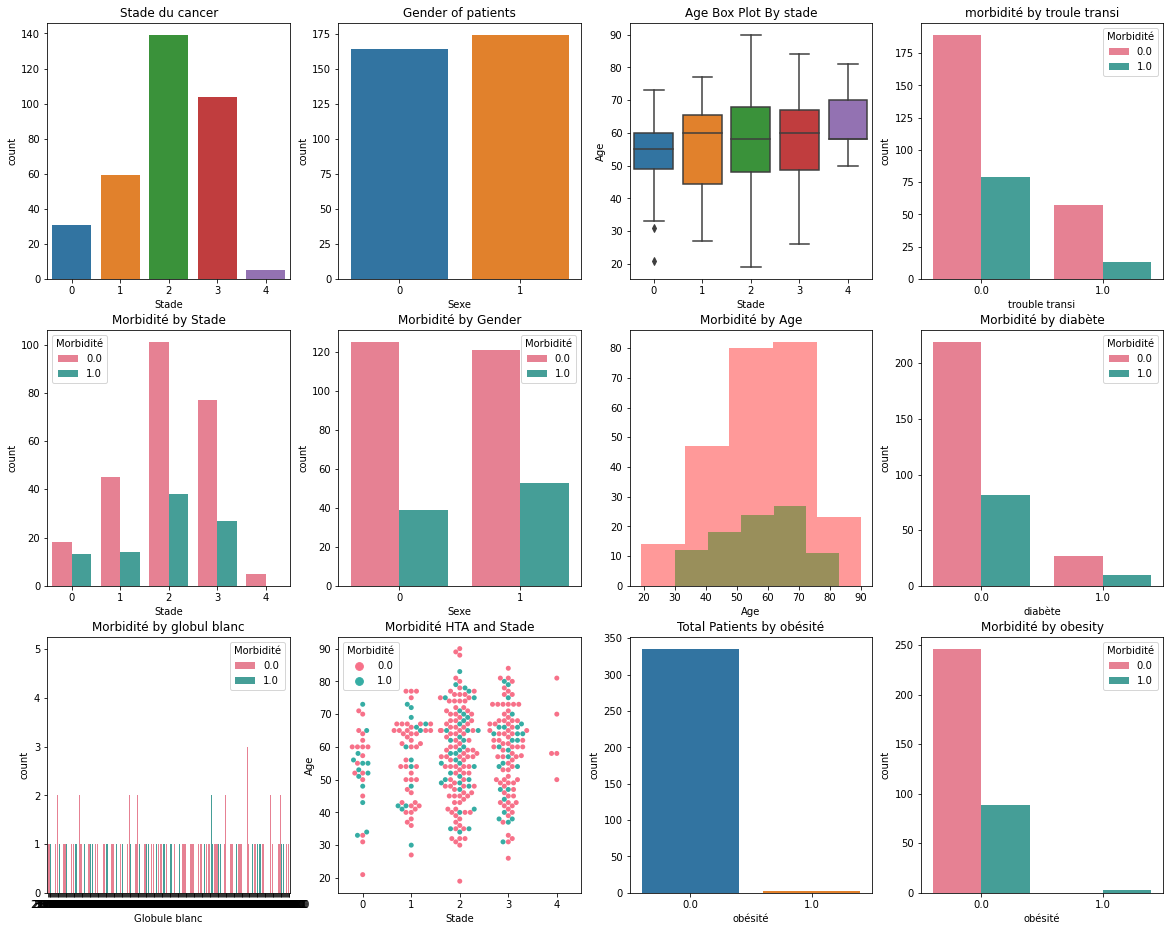

In [152]:
f,ax = plt.subplots(3,4,figsize=(20,16))
sns.countplot('Stade',data=train,ax=ax[0,0])
sns.countplot('Sexe',data=train,ax=ax[0,1])
sns.boxplot(x='Stade',y='Age',data=train,ax=ax[0,2])
sns.countplot('trouble transi',hue='Morbidité',data=train,ax=ax[0,3],palette='husl')
sns.countplot('obésité',data=train,ax=ax[2,2])

sns.countplot('Stade',hue='Morbidité',data=train,ax=ax[1,0],palette='husl')
sns.countplot('Sexe',hue='Morbidité',data=train,ax=ax[1,1],palette='husl')
sns.distplot(train[train['Morbidité']==0]['Age'],ax=ax[1,2],kde=False,color='r',bins=5)
sns.distplot(train[train['Morbidité']==1]['Age'],ax=ax[1,2],kde=False,color='g',bins=5)
sns.countplot('diabète',hue='Morbidité',data=train,ax=ax[1,3],palette='husl')
sns.swarmplot(x='Stade',y='Age',hue='Morbidité',data=train,palette='husl',ax=ax[2,1])
sns.countplot('obésité',hue='Morbidité',data=train,ax=ax[2,3],palette='husl')
sns.countplot('Globule blanc',hue='Morbidité',data=train,ax=ax[2,0],palette='husl')

ax[0,0].set_title('Stade du cancer')
ax[0,1].set_title('Gender of patients')
ax[0,2].set_title('Age Box Plot By stade')
ax[0,3].set_title('morbidité by troule transi')
ax[1,0].set_title('Morbidité by Stade')
ax[1,1].set_title('Morbidité by Gender')
ax[1,2].set_title('Morbidité by Age')
ax[1,3].set_title('Morbidité by diabète')
ax[2,0].set_title('Morbidité by globul blanc')
ax[2,1].set_title('Morbidité HTA and Stade')
ax[2,2].set_title('Total Patients by obésité')
ax[2,3].set_title('Morbidité by obesity')



### Detecting and correcting outliers
Reviewing the data, there does not appear to be any aberrant or non-acceptable data inputs.

There are potential outliers that we will identify :
* It creates firset a function called detect_outliers, implementing the Tukey method
* For each column of the dataframe, this function calculates the 25th percentile (Q1) and 75th percentile (Q3) values.
* The  interquartile range (IQR) is a measure of statistical dispersion, being equal to the difference between the 75th and 25th percentiles, or between upper and lower quartiles.
* Any data points outside 1.5 time the IQR (1.5 time IQR below Q1, or 1.5 time IQR above Q3), is considered an outlier.
* The outlier_list_col column captures the indices of these outliers. All outlier data get then pulled into the outlier_indices dataframe.
* Finally, the detect_outliers function will select only the outliers happening multiple times. This is the datadframe that will be returned.

In [153]:
# Outlier detection 
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col],25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index       
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 11 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    return multiple_outliers   
# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,11,train.columns.tolist())
train.loc[Outliers_to_drop] # Show the outliers rows

,Age,Hémoglobine,Globule blanc,Plaquette,CRP,Urée,Créat,Glycémie,Albumine,Préalbumine,...,CHemorEvolu,CpltPérinéal,CPérinéDiagnos,CPérinTraite,CPérinEvolut,CplUrinair,CUrinaiDiagn,CUrinairEvolu,Cplct Générl,Décès
106,19.0,7.8,4620.0,434000.000000,41.000000,0.22,5.000000,1.810000,32.000000,0.130000,...,0,0.0,0,0,0,0.0,0,0,0.0,2
102,55.0,13.2,14420.0,356000.000000,19.000000,0.27,8.000000,1.077961,25.000000,0.030000,...,0,0.0,0,0,0,0.0,0,0,0.0,2
155,41.0,12.6,17350.0,656000.000000,353.000000,0.21,7.000000,0.620000,34.000000,0.259902,...,0,0.0,0,0,0,0.0,0,0,0.0,0
162,45.0,6.5,18440.0,744000.000000,312.000000,0.31,8.000000,1.077961,53.000000,0.259902,...,0,0.0,0,0,0,0.0,0,0,0.0,0
232,48.0,9.7,19220.0,566000.000000,238.000000,0.58,7.661722,0.750000,35.601695,0.259902,...,0,0.0,0,0,0,0.0,0,0,0.0,1
36,39.0,9.9,9800.0,547000.000000,105.000000,0.23,6.000000,1.077961,33.000000,0.030000,...,0,0.0,0,0,0,0.0,0,0,0.0,0
105,62.0,9.5,13240.0,505000.000000,85.000000,0.24,6.000000,1.380000,22.000000,0.000000,...,0,0.0,0,0,0,0.0,0,0,0.0,2
161,40.0,10.9,5540.0,399000.000000,99.000000,0.12,5.000000,0.790000,31.000000,0.130000,...,0,0.0,0,0,0,0.0,0,0,0.0,0
166,45.0,10.6,5140.0,314000.000000,86.000000,0.29,8.000000,1.077961,33.000000,0.000000,...,0,0.0,0,0,0,0.0,0,0,0.0,0
172,75.0,14.2,11250.0,280132.835821,6.000000,0.93,11.000000,1.077961,31.000000,0.259902,...,0,0.0,0,0,0,0.0,0,0,0.0,2


** Observations**
* The Detect_Outliers function found 46 outliers.



In [154]:
# Drop outliers
train = train.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)



The .info function below shows how complete or incomplete the datasets are. 

In [155]:
train.info()
print('_'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Columns: 158 entries, Age to Décès
dtypes: float64(116), int32(1), int64(41)
memory usage: 359.4 KB
________________________________________


In [156]:
Morbidite = train['Morbidité']
Morbidite.describe()

count    292.000000
mean       0.215753
std        0.412050
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Morbidité, dtype: float64

## Visualising updated dataset

In [157]:
train.head(5)

,Age,Hémoglobine,Globule blanc,Plaquette,CRP,Urée,Créat,Glycémie,Albumine,Préalbumine,...,CHemorEvolu,CpltPérinéal,CPérinéDiagnos,CPérinTraite,CPérinEvolut,CplUrinair,CUrinaiDiagn,CUrinairEvolu,Cplct Générl,Décès
0,60.0,11.5,8170.0,331000.0,12.0,0.36,10.0,0.90,35.601695,0.259902,...,0,0.0,0,0,0,0.0,0,0,0.0,0
1,80.0,10.7,8680.0,197000.0,16.0,0.34,9.0,2.31,35.300000,0.230000,...,0,0.0,0,0,0,0.0,0,0,0.0,0
2,50.0,16.0,6890.0,157000.0,3.0,0.52,10.0,1.02,35.601695,0.259902,...,0,0.0,0,0,0,0.0,0,0,0.0,1
3,72.0,9.5,6730.0,238000.0,10.0,0.31,7.0,2.75,33.000000,0.040000,...,0,0.0,0,0,0,0.0,0,0,0.0,0
4,54.0,14.5,6230.0,183000.0,1.0,0.41,8.0,1.02,39.000000,0.259902,...,0,0.0,0,0,0,0.0,0,0,3.0,0


##  Descriptive statistics

In [158]:
train.describe()

,Age,Hémoglobine,Globule blanc,Plaquette,CRP,Urée,Créat,Glycémie,Albumine,Préalbumine,...,CHemorEvolu,CpltPérinéal,CPérinéDiagnos,CPérinTraite,CPérinEvolut,CplUrinair,CUrinaiDiagn,CUrinairEvolu,Cplct Générl,Décès
count,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,...,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000
mean,57.618599,11.633920,6789.724649,273997.485177,24.837829,0.274130,7.716913,1.067204,35.649193,0.144893,...,0.0,0.003425,0.003425,0.003425,0.003425,0.010274,0.020548,0.010274,0.023973,0.527397
std,13.431315,1.966082,2664.040766,101372.204204,42.548135,0.096367,2.562807,0.329490,5.080704,0.110670,...,0.0,0.058521,0.058521,0.058521,0.058521,0.101012,0.218372,0.101012,0.254392,0.665241
min,21.000000,7.700000,2270.000000,7000.000000,0.000000,0.050000,1.530000,0.440000,16.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.750000,10.000000,4750.000000,199000.000000,2.000000,0.200000,7.000000,0.910000,33.000000,0.030000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,11.700000,6400.000000,253500.000000,7.000000,0.260000,7.000000,1.077961,35.601695,0.150000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,67.000000,13.125000,8420.000000,323000.000000,26.860436,0.330000,8.000000,1.077961,39.000000,0.259902,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,16.700000,18340.000000,664000.000000,309.000000,0.680000,36.000000,3.770000,48.000000,0.340000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000


In [159]:
train[['Décès', 'Sexe', 'Protidemie', 'obésité', 'diabète', 'HTA', 'cardiopathie', 'Age', 'Morbidité']].groupby(['Morbidité'], as_index=False).mean().sort_values(by='Age' ,ascending=False)

,Morbidité,Décès,Sexe,Protidemie,obésité,diabète,HTA,cardiopathie,Age
0,0.0,0.462882,0.497817,66.321210,0.000000,0.109170,0.126638,0.048035,57.845550
1,1.0,0.761905,0.539683,69.197279,0.031746,0.063492,0.095238,0.079365,56.793651


**Initial observations from the descriptive statistics:**
* 76% of those who had "morbidité=1" died, a real tragedy :-(
* Also, the higher the "Protidemie", the higher the probability to have "morbidité=1". Similarly, having obesity increase the probability of getting complications.
* Women (1) have a higher probability to get complications than men (0)
* older people slightly have chance than younger
* having cardipathie increase the probability to get complications.



# Correlation analysis - Multi-variate analysis
This section summarizes  bivariate analysis asthe simplest forms of quantitative (statistical) analysis.
It involves the analysis of one or two features, and their relative impact of "Morbidité". 
This is a useful frist step of our anblaysis in order to determine the empirical relationship between all features.

##  Correlation analysis with histograms and pivot-tables

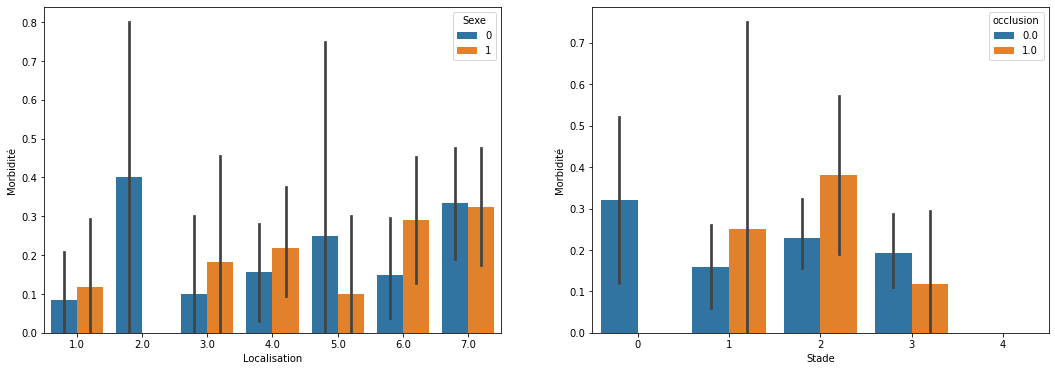

In [160]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(18,6))
sns.barplot(x="Localisation", y="Morbidité", hue="Sexe", data=train, ax = axis1);
sns.barplot(x="Stade", y="Morbidité", hue="occlusion", data=train, ax = axis2);

**Observations
:**
* 0 or blue represent men; 1 or orange represent women. Gender and localisation seem to have a stronger influence of the complication's rate.
* We start to find on which "localisation" patients have a high probability to get complications during their operation : localisation=7.
* What is statistically interesting is that only men (Age Category = 0) have "localisation=2" and all those who have "cancer stade=0" got "occlusion=0". 


In [161]:
train_pivot = pd.pivot_table(train, values= 'Morbidité',index=['obésité', 'Stade'],columns='Sexe',aggfunc=np.mean, margins=True)
def color_negative_red(val):
    # Takes a scalar and returns a string with the css property 'color: red' if below 0.4, black otherwise.
    color = 'red' if val < 0.4 else 'black'
    return 'color: %s' % color
train_pivot = train_pivot.style.applymap(color_negative_red)
train_pivot

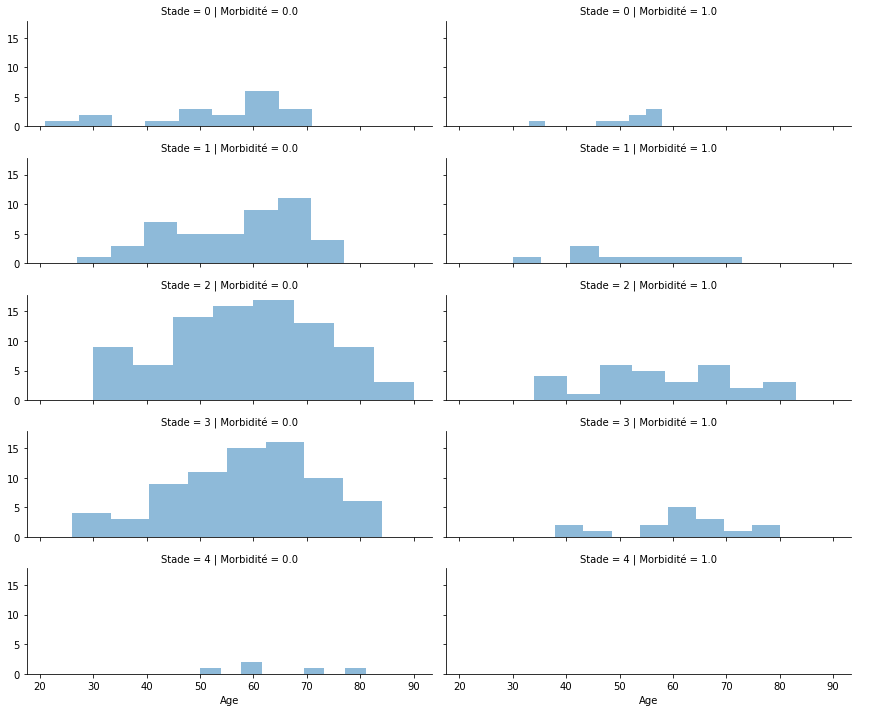

In [162]:

grid = sns.FacetGrid(train, col='Morbidité', row='Stade', size=2, aspect=3)
grid.map(plt.hist, 'Age', alpha=.50, bins=8)
grid.add_legend();

In [163]:
allData= pd.concat([quant_data, data], axis=1)
allData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Columns: 158 entries, Age to Décès
dtypes: float64(116), int32(1), int64(41)
memory usage: 416.0 KB


In [164]:
possible_features1=[]
for col in allData.columns[allData.columns.get_loc('Age'):allData.columns.get_loc("DécèsPostOP")]:
    possible_features1.append(col)
X_Train, x_test, y_Train, y_test=train_test_split(allData[possible_features1],
                                              allData['Morbidité'],test_size=0.2,random_state=1)

In [165]:
smote_nc=SMOTENC(categorical_features=[i for i in range (15,107)],random_state=42) #specifying categorical column numbers
# New training dataset with smote applied to it
X_train, Y_train = smote_nc.fit_resample(X_Train, y_Train)

# 4. Predictive modelling, cross-validation, hyperparameters and ensembling

* 4.1. Logistic Regression
* 4.2. Support Vector Machines (supervised)
* 4.3. k-Nearest Neighbors algorithm (k-NN)
* 4.4. Naive Bayes classifier
* 4.5. Perceptron
* 4.6 Linear SVC
* 4.7 Stochastic Gradient Descent
* 4.8. Decision tree
* 4.9 Random Forrest
* 4.10 Model summary
* 4.11. Model cross-validation with K-Fold
* 4.12 Hyperparameter tuning & learning curves for selected classifiers
* 4.13 Selecting and combining the best classifiers
* 4.14 Ensembling
* 4.15. Summary of most important features

## 4.1. Logistic Regression
Logistic regression measures the relationship between the categorical dependent feature (in our case morbidité) and the other independent features.
It estimates probabilities using a cumulative logistic distribution:
* The first value shows the accuracy of this model
* The table after this shows the importance of each feature according this classifier.

In [166]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(x_test)
acc_log = round(logreg.score(x_test, y_test) * 100, 2)
acc_log

57.35

In [167]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, Y_pred1))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred1), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.76      0.55      0.64        47
         1.0       0.38      0.62      0.47        21

    accuracy                           0.57        68
   macro avg       0.57      0.59      0.56        68
weighted avg       0.65      0.57      0.59        68

             Predicted: NO  Predicted: YES
Actual: NO              26              21
Actual: YES              8              13



## 4.2. Support Vector Machines (supervised)
Given a set of training samples, each sample is marked as belonging to one or the other of two categories.

The SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [168]:
svc=SVC()
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(x_test)
acc_svc = round(svc.score(x_test, y_test) * 100, 2)
acc_svc

41.18

In [169]:
print(classification_report(y_test, Y_pred2))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred2), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.68      0.28      0.39        47
         1.0       0.31      0.71      0.43        21

    accuracy                           0.41        68
   macro avg       0.50      0.50      0.41        68
weighted avg       0.57      0.41      0.40        68

             Predicted: NO  Predicted: YES
Actual: NO              13              34
Actual: YES              6              15


## 4.3. k-Nearest Neighbors algorithm (k-NN)
This is a non-parametric method used for classification and regression.
A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

In [170]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', 
                           metric_params=None, n_jobs=1, n_neighbors=10, p=2, 
                           weights='uniform')
knn.fit(X_train, Y_train)
knn_predictions = knn.predict(x_test)
acc_knn = round(knn.score(x_test, y_test) * 100, 2)

test_morbidité = pd.Series(knn_predictions, name="Morbidité")

acc_knn

54.41

In [171]:
print(classification_report(y_test, knn_predictions))
cm = pd.DataFrame(confusion_matrix(y_test, knn_predictions), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.69      0.62      0.65        47
         1.0       0.31      0.38      0.34        21

    accuracy                           0.54        68
   macro avg       0.50      0.50      0.50        68
weighted avg       0.57      0.54      0.56        68

             Predicted: NO  Predicted: YES
Actual: NO              29              18
Actual: YES             13               8


[40, 0.696969696969697]


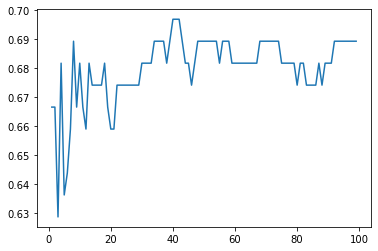

In [172]:
## Selecting the right n_neighbors for the k-NN classifier
x_trainknn, x_testknn, y_trainknn, y_testknn = train_test_split(X_train,Y_train,test_size = .33, random_state = 0)
nn_scores = []
best_prediction = [-1,-1]
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='minkowski', p =2)
    knn.fit(x_trainknn, y_trainknn)
    score = accuracy_score(y_testknn, knn.predict(x_testknn))
    #print i, score
    if score > best_prediction[1]:
        best_prediction = [i, score]
    nn_scores.append(score)
print (best_prediction)
plt.plot(range(1,100),nn_scores)

## 4.4. Naive Bayes classifier
This is a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of features in a learning problem.

In [173]:
gaussian = GaussianNB(var_smoothing=1e-12)
gaussian.fit(X_train, Y_train)
Y_pred3 = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
acc_gaussian

63.24

In [174]:
print(classification_report(y_test, Y_pred3))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred3), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.81      0.62      0.70        47
         1.0       0.44      0.67      0.53        21

    accuracy                           0.63        68
   macro avg       0.62      0.64      0.61        68
weighted avg       0.69      0.63      0.65        68

             Predicted: NO  Predicted: YES
Actual: NO              29              18
Actual: YES              7              14


## 4.5. Perceptron
This is an algorithm for supervised learning of binary classifiers: like the other classifiers before, it decides whether an input, represented by a vector of numbers, belongs to some specific class or not. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [175]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred4 = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_test, y_test) * 100, 2)
acc_perceptron

69.12

In [176]:
print(classification_report(y_test, Y_pred4))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred4), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82        47
         1.0       0.00      0.00      0.00        21

    accuracy                           0.69        68
   macro avg       0.35      0.50      0.41        68
weighted avg       0.48      0.69      0.56        68

             Predicted: NO  Predicted: YES
Actual: NO              47               0
Actual: YES             21               0


## 4.6. Linear SVC
This is another implementation of Support Vector Classification (similar to 4.2.) for the case of a linear kernel.

In [177]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred5 = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_test, y_test) * 100, 2)
acc_linear_svc

30.88

In [178]:
print(classification_report(y_test, Y_pred5))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred5), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        47
         1.0       0.31      1.00      0.47        21

    accuracy                           0.31        68
   macro avg       0.15      0.50      0.24        68
weighted avg       0.10      0.31      0.15        68

             Predicted: NO  Predicted: YES
Actual: NO               0              47
Actual: YES              0              21


## 4.7. Stochastic Gradient Descent (sgd)
This is a stochastic approximation of the gradient descent optimization and iterative method for minimizing an objective function that is written as a sum of differentiable functions. In other words, SGD tries to find minima or maxima by iteration.

In [179]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred6 = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_test, y_test) * 100, 2)
acc_sgd

69.12

In [180]:
print(classification_report(y_test, Y_pred6))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred6), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82        47
         1.0       0.00      0.00      0.00        21

    accuracy                           0.69        68
   macro avg       0.35      0.50      0.41        68
weighted avg       0.48      0.69      0.56        68

             Predicted: NO  Predicted: YES
Actual: NO              47               0
Actual: YES             21               0


## 4.8. Decision tree
This predictive model  maps features (tree branches) to conclusions about the target value (tree leaves).

The target features  take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

In [181]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred7 = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_test, y_test) * 100, 2)
acc_decision_tree

51.47

In [182]:
print(classification_report(y_test, Y_pred7))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred7), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66        47
         1.0       0.17      0.14      0.15        21

    accuracy                           0.51        68
   macro avg       0.40      0.41      0.41        68
weighted avg       0.49      0.51      0.50        68

             Predicted: NO  Predicted: YES
Actual: NO              32              15
Actual: YES             18               3


## 4.9. Random Forests
This is one of the most popular classfier.
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees

In [183]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_predictions = random_forest.predict(x_test)
acc_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)


# Preparing data for Submission 2
test_morbidité = pd.Series(random_forest_predictions, name="Morbidité")


acc_random_forest

66.18

In [184]:
print(classification_report(y_test, random_forest_predictions))
cm = pd.DataFrame(confusion_matrix(y_test, random_forest_predictions), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.69      0.91      0.79        47
         1.0       0.33      0.10      0.15        21

    accuracy                           0.66        68
   macro avg       0.51      0.51      0.47        68
weighted avg       0.58      0.66      0.59        68

             Predicted: NO  Predicted: YES
Actual: NO              43               4
Actual: YES             19               2


## 4.10. Model summary
I found that the picture illustrates the various model better than words.
This should be taken with a grain of salt, as the intuition conveyed by these two-dimensional examples does not necessarily carry over to real datasets.
The reality os that the algorithms work with many dimensions (11 in our case).

But it shows how each classifier algorithm partitions the same data in different ways.
The three rows represent the three different data set on the right.
The plots show training points in solid colors and testing points semi-transparent. The lower right shows the classification accuracy on the test set.

For instance, the visualization helps understand how RandomForest uses multiple Decision Trees, the linear SVC, or Nearest Neighbors grouping sample by their relative distance to each others.

![image](http://scikit-learn.org/0.15/_images/plot_classifier_comparison_0011.png)


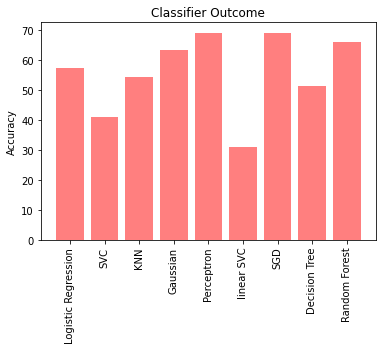

In [185]:
objects = ('Logistic Regression', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'linear SVC', 'SGD', 'Decision Tree', 'Random Forest')
x_pos = np.arange(len(objects))
accuracies1 = [acc_log, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, acc_decision_tree, acc_random_forest]
    
plt.bar(x_pos, accuracies1, align='center', alpha=0.5, color='r')
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Classifier Outcome')
plt.show()

**Observations**
* The above models (classifiers) were applied to a split training and x_test datasets.
* This results in some classifiers (Decision_tree and Random_Forest) over-fitting the model to the training data. 
* This happens when the classifiers use many input features (to include noise in each feature) on the complete dataset, and ends up “memorizing the noise” instead of finding the signal.
* This overfit model will then make predictions based on that noise. It performs unusually well on its training data, but will not necessarilyimprove the prediction quality with new data from the test dataset.
* In the next section, we will cross-validate the models using sample data against each others. We will this by using StratifiedKFold to train and test the models on sample data from the overall dataset.
Stratified K-Folds is a cross validation iterator. It provides train/test indices to split data in train test sets. This cross-validation object is a variation of KFold, which returns stratified folds. The folds are made by preserving the percentage of samples for each class.

## 4.11. Model cross-validation with K-Fold

The fitting process applied above optimizes the model parameters to make the model fit the training data as well as possible.
Cross-validation is a way to predict the fit of a model to a hypothetical validation set when an explicit validation set is not available.
In simple words, it allows to test how well the model performs on new data.
In our case, cross-validation will also be applied to compare the performances of different predictive modeling procedures. 
![Cross-validation process:](https://image.slidesharecdn.com/kagglesharingmarkpeng20151216finalpresented-151216161621/95/general-tips-for-participating-kaggle-competitions-13-638.jpg?cb=1452565877)
### Cross-validation scores

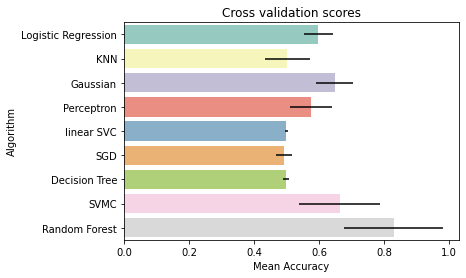

In [186]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 0

classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier(n_neighbors=40, weights='distance', metric='minkowski', p =2))
classifiers.append(GaussianNB())
classifiers.append(Perceptron(random_state=random_state))
classifiers.append(LinearSVC(random_state=random_state))
classifiers.append(SGDClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":['Logistic Regression',  'KNN', 'Gaussian',
    'Perceptron', 'linear SVC', 'SGD', 'Decision Tree','SVMC', 'Random Forest']})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [187]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.598013,0.044359,Logistic Regression
1,0.502436,0.069303,KNN
2,0.648141,0.057549,Gaussian
3,0.575321,0.063923,Perceptron
4,0.500000,0.005734,linear SVC
5,0.492628,0.025933,SGD
6,0.497500,0.009441,Decision Tree
7,0.663782,0.125730,SVMC
8,0.829615,0.152181,Random Forest


## 4.12 Hyperparameter tuning & learning curves for selected classifiers

**1. Adaboost** is used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers.

**2. ExtraTrees** implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting.

**3. RandomForest** operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.

**4. GradientBoost** produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

**5. KNN .** a supervised machine learning algorithm (as opposed to an unsupervised machine learning algorithm) is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.

All descripotion adapted from Wikipedia.

### Adaboost

In [193]:
# Adaboost
DTC = DecisionTreeClassifier()
adaDTC = AdaBoostClassifier(DTC, random_state=7)
ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}
gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="recall", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
adaDTC_best = gsadaDTC.best_estimator_
print(adaDTC_best)
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=0.0001, n_estimators=1, random_state=7)


0.7394736842105263

from 0.48 to 0.73

In [194]:
ada=AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy'),
                   learning_rate=0.0001, n_estimators=1, random_state=7)
ada.fit(X_train, Y_train)
print(classification_report(y_test, ada.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71        47
         1.0       0.36      0.38      0.37        21

    accuracy                           0.60        68
   macro avg       0.54      0.54      0.54        68
weighted avg       0.61      0.60      0.61        68



### Extra trees

In [195]:
# ExtraTrees 
ExtC = ExtraTreesClassifier()
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsExtC.fit(X_train,Y_train)
ExtC_best = gsExtC.best_estimator_
print(ExtC_best)
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits
ExtraTreesClassifier(max_features=7, n_estimators=600)


0.8020512820512821

In [201]:
Ext=ExtraTreesClassifier(max_features=3, min_samples_leaf=10, n_estimators=300)
Ext.fit(X_train, Y_train)
print(classification_report(y_test, Ext.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.80      0.79      0.80        47
         1.0       0.55      0.57      0.56        21

    accuracy                           0.72        68
   macro avg       0.67      0.68      0.68        68
weighted avg       0.72      0.72      0.72        68



### GBC

In [205]:
# Gradient boosting tunning
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] }
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="recall", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train,Y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


0.74

In [206]:
print(GBC_best)

GradientBoostingClassifier(max_depth=4, max_features=0.1, min_samples_leaf=100,
                           n_estimators=300)


In [214]:
gbc=GradientBoostingClassifier(max_depth=4, max_features=0.1, min_samples_leaf=100,
                           n_estimators=300)
gbc.fit(X_train, Y_train)
print(classification_report(y_test, gbc.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.75      0.81      0.78        47
         1.0       0.47      0.38      0.42        21

    accuracy                           0.68        68
   macro avg       0.61      0.59      0.60        68
weighted avg       0.66      0.68      0.67        68



### Random forest

In [215]:
# Random Forest
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 7],
              "min_samples_split": [2, 3, 7],
              "min_samples_leaf": [1, 3, 7],
              "bootstrap": [False],
              "n_estimators" :[300,600],
              "criterion": ["gini"]}
gsrandom_forest = GridSearchCV(random_forest,param_grid = rf_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)
gsrandom_forest.fit(X_train,Y_train)
# Best score
random_forest_best = gsrandom_forest.best_estimator_
gsrandom_forest.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


0.7943475873821875

In [216]:
print(random_forest_best)

RandomForestClassifier(bootstrap=False, max_features=7, n_estimators=600)


In [219]:
rdf=RandomForestClassifier(bootstrap=False, max_features=7, n_estimators=600)
rdf.fit(X_train, Y_train)
print(classification_report(y_test, rdf.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.70      0.91      0.80        47
         1.0       0.43      0.14      0.21        21

    accuracy                           0.68        68
   macro avg       0.57      0.53      0.51        68
weighted avg       0.62      0.68      0.62        68



### Naive Bayes

In [220]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import pprint
from scipy import stats
from IPython.display import display
def plot_grid_search(clf):
    """Plot as many graphs as parameters are in the grid search results.

    Each graph has the values of each parameter in the X axis and the Score in the Y axis.

    Parameters
    ----------
    clf: estimator object result of a GridSearchCV
        This object contains all the information of the cross validated results for all the parameters combinations.
    """
    # Convert the cross validated results in a DataFrame ordered by `rank_test_score` and `mean_fit_time`.
    # As it is frequent to have more than one combination with the same max score,
    # the one with the least mean fit time SHALL appear first.
    cv_results = pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score', 'mean_fit_time'])

    # Get parameters
    parameters=cv_results['params'][0].keys()

    # Calculate the number of rows and columns necessary
    rows = -(-len(parameters) // 2)
    columns = min(len(parameters), 2)
    # Create the subplot
    fig = make_subplots(rows=rows, cols=columns)
    # Initialize row and column indexes
    row = 1
    column = 1

    # For each of the parameters
    for parameter in parameters:

        # As all the graphs have the same traces, and by default all traces are shown in the legend,
        # the description appears multiple times. Then, only show legend of the first graph.
        if row == 1 and column == 1:
            show_legend = True
        else:
            show_legend = False

        # Mean test score
        mean_test_score = cv_results[cv_results['rank_test_score'] != 1]
        fig.add_trace(go.Scatter(
            name='Mean test score',
            x=mean_test_score['param_' + parameter],
            y=mean_test_score['mean_test_score'],
            mode='markers',
            marker=dict(size=mean_test_score['mean_fit_time'],
                        color='SteelBlue',
                        sizeref=2. * cv_results['mean_fit_time'].max() / (40. ** 2),
                        sizemin=4,
                        sizemode='area'),
            text=mean_test_score['params'].apply(
                lambda x: pprint.pformat(x, width=-1).replace('{', '').replace('}', '').replace('\n', '<br />')),
            showlegend=show_legend),
            row=row,
            col=column)

        # Best estimators
        rank_1 = cv_results[cv_results['rank_test_score'] == 1]
        fig.add_trace(go.Scatter(
            name='Best estimators',
            x=rank_1['param_' + parameter],
            y=rank_1['mean_test_score'],
            mode='markers',
            marker=dict(size=rank_1['mean_fit_time'],
                        color='Crimson',
                        sizeref=2. * cv_results['mean_fit_time'].max() / (40. ** 2),
                        sizemin=4,
                        sizemode='area'),
            text=rank_1['params'].apply(str),
            showlegend=show_legend),
            row=row,
            col=column)

        fig.update_xaxes(title_text=parameter, row=row, col=column)
        fig.update_yaxes(title_text='Score', row=row, col=column)

        # Check the linearity of the series
        # Only for numeric series
        if pd.to_numeric(cv_results['param_' + parameter], errors='coerce').notnull().all():
            x_values = cv_results['param_' + parameter].sort_values().unique().tolist()
            r = stats.linregress(x_values, range(0, len(x_values))).rvalue
            # If not so linear, then represent the data as logarithmic
            if r < 0.86:
                fig.update_xaxes(type='log', row=row, col=column)

        # Increment the row and column indexes
        column += 1
        if column > columns:
            column = 1
            row += 1

            # Show first the best estimators
    fig.update_layout(legend=dict(traceorder='reversed'),
                      width=columns * 360 + 100,
                      height=rows * 360,
                      title='Best score: {:.6f} with {}'.format(cv_results['mean_test_score'].iloc[0],
                                                                str(cv_results['params'].iloc[0]).replace('{',
                                                                                                          '').replace(
                                                                    '}', '')),
                      hovermode='closest',
                      template='none')
    fig.show()


def table_grid_search(clf, all_columns=False, all_ranks=False, save=True):
    """Show tables with the grid search results.

    Parameters
    ----------
    clf: estimator object result of a GridSearchCV
        This object contains all the information of the cross validated results for all the parameters combinations.

    all_columns: boolean, default: False
        If true all columns are returned. If false, the following columns are dropped:

        - params. As each parameter has a column with the value.
        - std_*. Standard deviations.
        - split*. Split scores.

    all_ranks: boolean, default: False
        If true all ranks are returned. If false, only the rows with rank equal to 1 are returned.

    save: boolean, default: True
        If true, results are saved to a CSV file.
    """
    # Convert the cross validated results in a DataFrame ordered by `rank_test_score` and `mean_fit_time`.
    # As it is frequent to have more than one combination with the same max score,
    # the one with the least mean fit time SHALL appear first.
    cv_results = pd.DataFrame(clf.cv_results_).sort_values(by=['rank_test_score', 'mean_fit_time'])

    # Reorder
    columns = cv_results.columns.tolist()
    # rank_test_score first, mean_test_score second and std_test_score third
    columns = columns[-1:] + columns[-3:-1] + columns[:-3]
    cv_results = cv_results[columns]

    if save:
        cv_results.to_csv('--'.join(cv_results['params'][0].keys()) + '.csv', index=True, index_label='Id')

    # Unless all_columns are True, drop not wanted columns: params, std_* split*
    if not all_columns:
        cv_results.drop('params', axis='columns', inplace=True)
        cv_results.drop(list(cv_results.filter(regex='^std_.*')), axis='columns', inplace=True)
        cv_results.drop(list(cv_results.filter(regex='^split.*')), axis='columns', inplace=True)

    # Unless all_ranks are True, filter out those rows which have rank equal to one
    if not all_ranks:
        cv_results = cv_results[cv_results['rank_test_score'] == 1]
        cv_results.drop('rank_test_score', axis = 'columns', inplace = True)        
        cv_results = cv_results.style.hide_index()

    display(cv_results)

In [221]:
parameters = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
}
clf = GridSearchCV(gaussian, parameters, cv=kfold, scoring="f1", n_jobs=4, verbose=1)
clf.fit(X_train, Y_train)
plot_grid_search(clf)
table_grid_search(clf)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


mean_test_score,mean_fit_time,mean_score_time,param_var_smoothing
0.716751,0.001846,0.004056,0.000000


In [222]:
gaussian = GaussianNB(var_smoothing=1e-11)
gaussian.fit(X_train, Y_train)
Y_pred3 = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
acc_gaussian

print(classification_report(y_test, Y_pred3))
cm = pd.DataFrame(confusion_matrix(y_test, Y_pred3), ['Actual: NO', 'Actual: YES'], ['Predicted: NO', 'Predicted: YES'])
print(cm)

              precision    recall  f1-score   support

         0.0       0.84      0.55      0.67        47
         1.0       0.43      0.76      0.55        21

    accuracy                           0.62        68
   macro avg       0.64      0.66      0.61        68
weighted avg       0.71      0.62      0.63        68

             Predicted: NO  Predicted: YES
Actual: NO              26              21
Actual: YES              5              16


### Learning curves

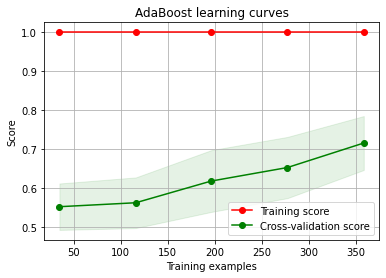

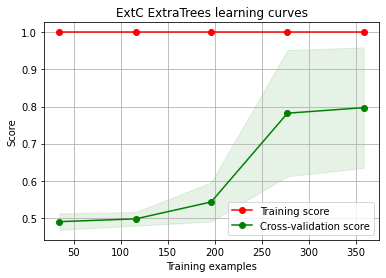

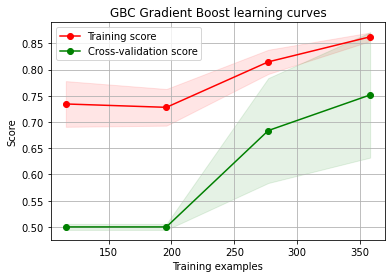

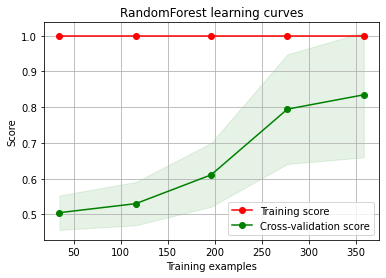

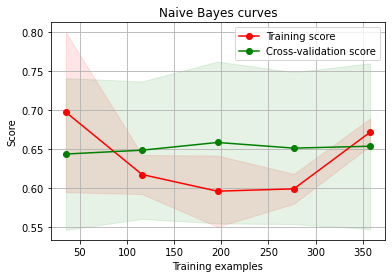

In [223]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtC ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GBC Gradient Boost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsrandom_forest.best_estimator_,"RandomForest learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gaussian,"Naive Bayes curves",X_train,Y_train,cv=kfold)

**Observations to fine-tune our models**

First, let's compare their best score after fine-tuning their parameters:
1. Adaboost: 73
2. ExtraTrees: 79
3. RandomForest: 79
4. GradientBoost: 73
5. Naive Bayes : 71
it appears that random forest and extra trees classifiers are doing the best job on the Train data. This is good because we want to keep the model as close to the training data as possible. But not too close!
The two major sources of error are bias and variance; as we reduce these two, then we could build more accurate models:

* **Bias**: The less biased a method, the greater its ability to fit data well.
* **Variance**: with a lower bias comes typically a higher the variance. And therefore the risk that the model will not adapt accurately to new test data.
This is the case here with other models except GBC: high score but cross-validation is very distant.

The reverse also holds: the greater the bias, the lower the variance. A high-bias method builds simplistic models that generally don't fit well training data. 
We can see the red and green curves from ExtraTrees, RandomForest are pretty far.
**This points to a lower variance, i.e. a stronger ability to apply the model to new data.**

I used the above graphs to optimize the parameters for Adaboost, ExtraTrees, RandomForest, GradientBoost.
This resulted in a significant improvement of the prediction accuracy on the test data (score).


## 4.13 Selecting and combining the best classifiers
So, how do we achieve the best trade-off beween bias and variance?
1. We will first compare in the next section the classifiers; results between themselves and applied to the same test data.
2. Then "ensemble" them together with an automatic function callled *voting*.

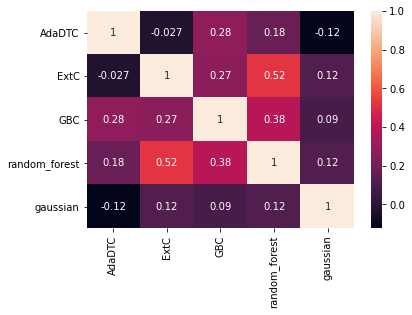

In [224]:
test_morbidité_AdaDTC = pd.Series(adaDTC_best.predict(x_test), name="AdaDTC")
test_morbidité_ExtC = pd.Series(ExtC_best.predict(x_test), name="ExtC")
test_morbidité_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")
test_morbidité_random_forest = pd.Series(random_forest_best.predict(x_test), name="random_forest")
test_morbidité_gaussian = pd.Series(gaussian.predict(x_test), name="gaussian")


# Concatenate all classifier results
ensemble_results = pd.concat([test_morbidité_AdaDTC, test_morbidité_ExtC, test_morbidité_GBC,test_morbidité_random_forest, test_morbidité_gaussian],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

**Observations:**
* As indicated before, AdaDTC has the lowest correlations when compared to other predictors. This indicates that it predicts differently than the others when it comes to the test data.
* We will therefore 'ensemble' the remaining three predictors.

##  Ensembling
This is the final step, pulling it together with an amazing 'Voting' function from sklearn.

In [304]:
VotingPredictor = VotingClassifier(estimators=[('ExtC', ExtC_best), ('GBC', GBC_best),
('random_forest', random_forest_best), ('Naive Bayes', gaussian)], voting='soft',weights=(1.5,1,1,1.3), n_jobs=4)
VotingPredictor = VotingPredictor.fit(X_train, Y_train)
VotingPredictor_predictions = VotingPredictor.predict(x_test)

scores = cross_val_score(VotingPredictor, X_train, Y_train, cv=kfold, scoring='accuracy')
print("Accuracy: %0.4f (+/- %0.4f) [%s]" % (scores.mean(), scores.std(), 'soft voting'))


Accuracy: 0.7539 (+/- 0.1045) [soft voting]


In [305]:
print(classification_report(y_test, VotingPredictor_predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84        47
         1.0       0.65      0.62      0.63        21

    accuracy                           0.78        68
   macro avg       0.74      0.74      0.74        68
weighted avg       0.78      0.78      0.78        68



<AxesSubplot:>

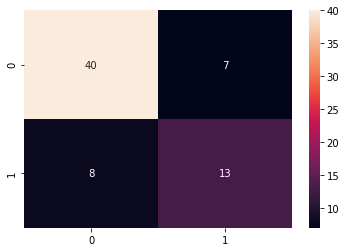

In [306]:
sns.heatmap(confusion_matrix(y_test,VotingPredictor_predictions),annot=True,fmt='2.0f')

Black boxes are wrong